## Data acquisition

In [1]:
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 97% 25.0M/25.7M [00:01<00:00, 26.1MB/s]
100% 25.7M/25.7M [00:01<00:00, 15.8MB/s]


In [2]:
! unzip /content/imdb-dataset-of-50k-movie-reviews.zip

Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [3]:
import pandas as pd

df = pd.read_csv("/content/IMDB Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


## Text cleaning & pre-processing

In [22]:
map = {
    "positive": 1,
    "negative": 0
}

df["sentiment"] = df["sentiment"].apply(lambda x: map[x])

### Clean texts

In [6]:
! pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=7c5b0895628f431d8f5b1e835e8fb3f79978880fe126554e9e90acd45d6dd0a1
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [7]:
from cleantext import clean
import re
def clean_text(text):
  text = re.sub("<[\d\D]*>", "", text)
  return clean(text,
    lower=True,                     # lowercase text
    no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
    no_urls=True,                  # replace all URLs with a special token
    no_emails=True,                # replace all email addresses with a special token
    no_phone_numbers=True,         # replace all phone numbers with a special token
    no_numbers=True,               # replace all numbers with a special token
    no_digits=True,                # replace all digits with a special token
    no_currency_symbols=True,      # replace all currency symbols with a special token
    no_punct=True,                 # remove punctuations
    replace_with_punct="",          # instead of removing punctuations you may replace them
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_number="",
    replace_with_currency_symbol="",
    lang="en"                       # set to 'de' for German special handling
)

In [8]:
df["cleaned_review"] = df["review"].apply(lambda rev: clean_text(rev))

df[["review", "cleaned_review"]]

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the realism real...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...
...,...,...
49995,I thought this movie did a down right good job...,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,im going to have to disagree with the previous...


### Word tokenization
Tokenize reviews into words and extract a list of words for each review. We can use the NLTK word tokenizer.

In [9]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

df['word_list'] = df['cleaned_review'].apply(lambda x:word_tokenize(str(x)))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,sentiment,cleaned_review,word_list
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the realism real...,"[a, wonderful, little, production, the, realis..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


### Find most common words and see if they would be useful

In [117]:
from collections import Counter

# list of words
top = Counter([word for words in df["word_list"] for word in words])

top_df = pd.DataFrame(top.most_common(10))
top_df.columns = ["word", "counts"]
top_df.style.background_gradient(cmap = 'Blues')

,word,counts
0,the,373610
1,a,191116
2,and,188186
3,of,168847
4,to,153998
5,is,123504
6,i,105247
7,in,104233
8,this,102197
9,it,100299


> These words called **stop words** and they are not useful, so we should remove them

### Remove stop words

In [11]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopword(word_list):
  return [word for word in word_list if word not in stopwords.words('english')]

df['word_list_without_sw'] = df['word_list'].apply(lambda x:remove_stopword(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
df.head()

,review,sentiment,cleaned_review,word_list,word_list_without_sw,final_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewer, mentioned, watching, oz, episo...",one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the realism real...,"[a, wonderful, little, production, the, realis...","[wonderful, little, production, realism, reall...",wonderful little production realism really com...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl...","[basically, there, family, little, boy, jake, ...",basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...


### Now let's see what are the most common words after removing "stop words"

In [13]:
from collections import Counter

# list of words
top = Counter([word for words in df["word_list_without_sw"] for word in words])

top_df = pd.DataFrame(top.most_common(10))
top_df.columns = ["word", "counts"]
top_df.style.background_gradient(cmap = 'Blues')

,word,counts
0,movie,59206
1,film,48785
2,one,31973
3,like,23830
4,good,18799
5,time,15002
6,see,14929
7,would,14795
8,even,14380
9,really,14353


### Lemmatization

- After removing stop words, we will return each word into its base form using **Lemmatization**.

In [14]:
df['word_list_without_sw'].head()

,word_list_without_sw
0,"[one, reviewers, mentioned, watching, oz, epis..."
1,"[wonderful, little, production, realism, reall..."
2,"[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, theres, family, little, boy, jake,..."
4,"[petter, matteis, love, time, money, visually,..."


In [15]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Will lemmatizate every word in a row to its base form and store the result back as a list
df['word_list_without_sw'] = df['word_list_without_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
df['word_list_without_sw'].sample(5)


,word_list_without_sw
34780,"[bad, make, film, good, question, house, dead,..."
16466,"[absolutely, awful, movie, utter, waste, timep..."
20068,"[favorite, game, nintendo, platform, ive, play..."
45925,"[seeing, forever, hollywood, would, natural, w..."
21025,"[long, ago, never, forgotten, series, often, w..."


### Concatinate all the words

- When we tokenized the sentences, a list is stored containing all the words. So in this step we want to concatinate all the words as one sentense using
`' '.join(single_word)`



In [ ]:
df['final_review'] = df['word_list_without_sw'].apply(lambda x:' '.join(x))


In [25]:
df.head()

,review,sentiment,cleaned_review,word_list,word_list_without_sw,final_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewer, mentioned, watching, oz, episo...",one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the realism real...,"[a, wonderful, little, production, the, realis...","[wonderful, little, production, realism, reall...",wonderful little production realism really com...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl...","[basically, there, family, little, boy, jake, ...",basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stunni...


In [ ]:
# Your code goes here:
df.to_csv('processed_train_reviews.csv', index=False)

## Feature engineering

- After cleaning process and the input is ready, we can now convert it into numbers using something called the **Bag of Words** approach.

> When the input is ready, we convert them from text to numeric. We use Bag of Words approach, which creates a column for every word. It has a problem where the order of the sentence is lost. There are other approach encounter this problem. We use a class called `CountVectorizer` from `sklearn.feature_extraction.text` module **to generate Bag of Words**. One thing we have specify is the number of max features since the number of columns might explode into large numbers

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# create a count vertorizer object and set the size of the vocabulary to 8000
cv = CountVectorizer(max_features = 8000, ngram_range = (1,2))

# convert the dtype of final review column to unicode string and convert them to bag of words
X = cv.fit_transform(df['final_review'].values.astype('U')).toarray()
y = df['sentiment']

In [94]:
print(type(df['final_review'].values))

<class 'numpy.ndarray'>


In [21]:
y.head()

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive


## Splitting dataset into train and test

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("number of reviews in training dataset: ", len(X_train))
print("number of reviews in testing dataset: ", len(X_test))

number of reviews in training dataset:  40000
number of reviews in testing dataset:  10000


## Modelling

In [28]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [29]:
mnb_model = MultinomialNB()
bnb_model = BernoulliNB()
lr_model = LogisticRegression(max_iter = 300, multi_class = "multinomial")
rfc_model = RandomForestClassifier(n_estimators = 50, random_state = 2, max_depth = 25)
tree_model = DecisionTreeClassifier(max_depth = 30)

Model:  Multinomial Naive Bayes
Accuracy:  0.8397
Precision:  0.8311488049344642
Recall:  0.8557253423298273
F1:  0.8432580424366872
Confusion Matrix:  [[4085  876]
 [ 727 4312]]


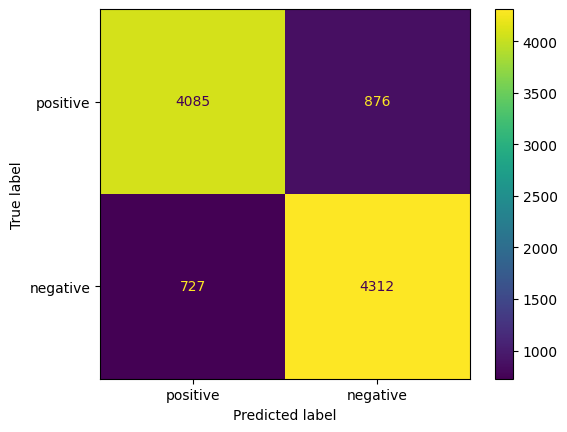

--------------------------------------------------
Model:  Bernoulli Naive Bayes
Accuracy:  0.8411
Precision:  0.8231547396028475
Recall:  0.8719984123834094
F1:  0.8468728919726318
Confusion Matrix:  [[4017  944]
 [ 645 4394]]


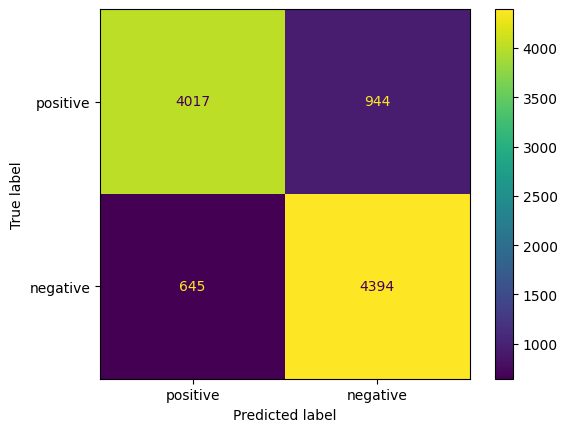

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  Logistic Regression
Accuracy:  0.8298
Precision:  0.8296779292629916
Recall:  0.833300257987696
F1:  0.8314851485148516
Confusion Matrix:  [[4099  862]
 [ 840 4199]]


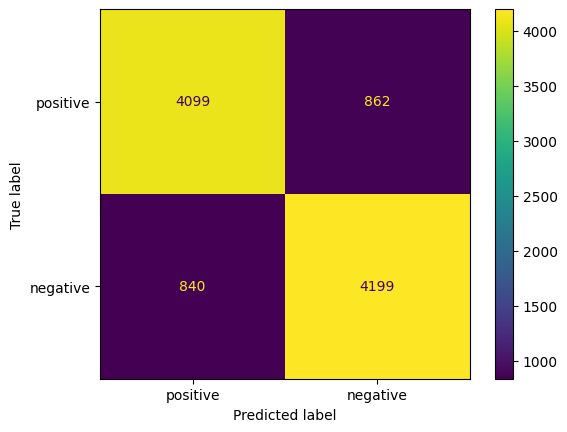

--------------------------------------------------
Model:  Random Forest Classifier
Accuracy:  0.7995
Precision:  0.7645622602023021
Recall:  0.8700138916451677
F1:  0.8138865682725334
Confusion Matrix:  [[3611 1350]
 [ 655 4384]]


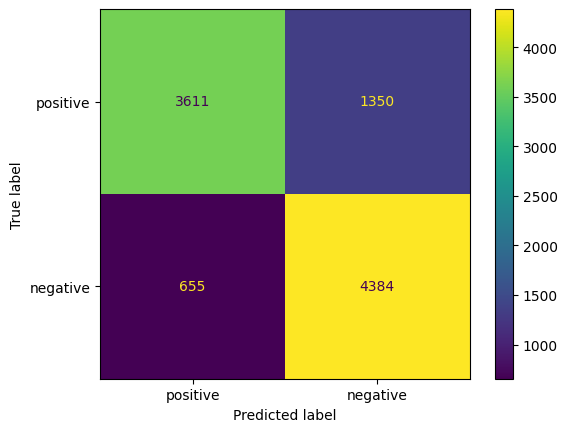

--------------------------------------------------
Model:  Decision Tree Classifier
Accuracy:  0.7079
Precision:  0.6700931577256666
Recall:  0.8279420519944434
F1:  0.7407012871726587
Confusion Matrix:  [[2907 2054]
 [ 867 4172]]


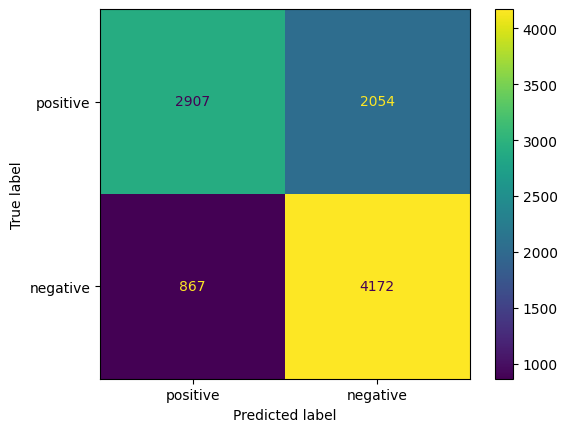

--------------------------------------------------


In [30]:
def train_classifier(model, X_train, y_train, X_test, y_test):
    # train the model on training data
    model.fit(X_train, y_train)

    # evaluate the model
    y_pred = model.predict(X_test)

    # calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, confusion, recall, f1

# create a dictionary of models
models = {
    'Multinomial Naive Bayes': mnb_model,
    'Bernoulli Naive Bayes': bnb_model,
    'Logistic Regression': lr_model,
    'Random Forest Classifier': rfc_model,
    'Decision Tree Classifier': tree_model
}

# create a list to store performance of models
accuracy_scores = []
precision_scores = []
confusions = []
recall_scores = []
f1_scores = []

for model_name, model in models.items():

    # train the model on training data
    cur_accuracy, cur_precision, cur_confusion, cur_recall, cur_f1 = train_classifier(model, X_train, y_train, X_test, y_test)

    # print model performance
    print("Model: " , model_name)
    print("Accuracy: ", cur_accuracy)
    print("Precision: ", cur_precision)
    print("Recall: ", cur_recall)
    print("F1: ", cur_f1)
    print("Confusion Matrix: ", cur_confusion)
    disp = ConfusionMatrixDisplay(cur_confusion, display_labels = map.keys())
    disp.plot()
    plt.show()

    print('-' * 50)

    # append the performance metrics to a list
    accuracy_scores.append(cur_accuracy)
    precision_scores.append(cur_precision)
    confusions.append(cur_confusion)
    recall_scores.append(cur_recall)
    f1_scores.append(cur_f1)


## Save the evaluation for each model as a dataframe

In order to show the performance of all models together a dataframe is created and displayed in the following cell.

In [32]:
performance_df = pd.DataFrame({'Algorithm': models.keys(),
                                'Accuracy': accuracy_scores,
                                'Precision': precision_scores,
                                'Recall': recall_scores,
                                'F1': f1_scores,
                                'Confusion': confusions}).sort_values("Accuracy", ascending = False, ignore_index = True)

performance_df


,Algorithm,Accuracy,Precision,Recall,F1,Confusion
0,Bernoulli Naive Bayes,0.8411,0.823155,0.871998,0.846873,"[[4017, 944], [645, 4394]]"
1,Multinomial Naive Bayes,0.8397,0.831149,0.855725,0.843258,"[[4085, 876], [727, 4312]]"
2,Logistic Regression,0.8298,0.829678,0.833300,0.831485,"[[4099, 862], [840, 4199]]"
3,Random Forest Classifier,0.7995,0.764562,0.870014,0.813887,"[[3611, 1350], [655, 4384]]"
4,Decision Tree Classifier,0.7079,0.670093,0.827942,0.740701,"[[2907, 2054], [867, 4172]]"


- We can see that **Bernoulli Naive Bayes** performs the best with an accuracy score of 84% followed by Multinomail Naive Bayes.


In [33]:
import pickle

file_name = "BernoulliNaiveBayes.pickle"
pickle.dump(lr_model, open(file_name, "wb"))


## Play around

**These reviews were generated by chatGPT:**

**Positive Reviews:**

Review: "I absolutely loved this movie! The plot was engaging, and the performances were top-notch."
Sentiment: Positive

Review: "A brilliant film with a powerful message. The cinematography was stunning, and the acting was flawless."
Sentiment: Positive

Review: "One of the best movies I’ve seen this year. It kept me on the edge of my seat the entire time."
Sentiment: Positive

Review: "An emotional rollercoaster with an amazing storyline. I highly recommend it to anyone who enjoys thrillers."
Sentiment: Positive

Review: "An entertaining and fun film with great special effects. A must-watch for action fans!"
Sentiment: Positive

**Negative Reviews:**

Review: "The movie was a complete waste of time. The plot was confusing, and the acting was terrible."
Sentiment: Negative

Review: "I couldn’t wait for the movie to end. It was boring, slow, and didn’t make any sense."
Sentiment: Negative

Review: "Disappointing on every level. The script was weak, and the characters were underdeveloped."
Sentiment: Negative

Review: "I had high hopes, but this film failed to deliver. The pacing was off, and the story was unoriginal."
Sentiment: Negative

Review: "The movie dragged on forever, and the plot twists were predictable. Definitely not worth watching."
Sentiment: Negative

In [115]:
import numpy as np


# new_review = "Well, the movie is great but scary at the same time. I'll watch it again"
org_reviews = ["I absolutely loved this movie! The plot was engaging, and the performances were top-notch",
         "A brilliant film with a powerful message. The cinematography was stunning, and the acting was flawless",
         "The movie was a complete waste of time. The plot was confusing, and the acting was terrible.",
         "Definitely not worth watching",
         "An emotional rollercoaster with an amazing storyline. I highly recommend it to anyone who enjoys thrillers",
          "I couldn’t wait for the movie to end. It was boring, slow, and didn’t make any sense."
         ]



# new_review = clean_text(reviews)
reviews = [clean_text(review) for review in org_reviews]

# new_review = word_tokenize(new_review)
reviews = [word_tokenize(review) for review in reviews]

# new_review = remove_stopword(new_review)
reviews = [remove_stopword(words) for words in reviews ]

# new_review = [lemmatizer.lemmatize(w) for w in new_review]
new_reviews = [None] * len(reviews)

for idx, words in enumerate(reviews):
  new_reviews[idx] = []
  for word in words:
    new_reviews[idx].append(lemmatizer.lemmatize(word))


# new_review = " ".join(new_review)
new_reviews = [" ".join(review) for review in new_reviews]

# new_review_cv = cv.transform([new_review])

new_reviews_cv = cv.transform(np.array(new_reviews))

new_reviews_pred = bnb_model.predict(new_reviews_cv)

df_to_store = {
    "Original_review": [],
    "Sentiment": ["Positive", "Positive", "Negative", "Negative", "Positive", "Negative"],
    "Review_after_cleaning_process": [],
    "Predicted_sentiment": []
}


for idx, review in enumerate(org_reviews):
  sentiment = "Positive" if new_reviews_pred[idx] == 1 else "Negative"
  print(f"This review ({review}) is a ({sentiment}) review")
  df_to_store["Original_review"].append(review)
  df_to_store["Review_after_cleaning_process"].append(reviews[idx])
  df_to_store["Predicted_sentiment"].append(sentiment)

df_to_store = pd.DataFrame(df_to_store)
df_to_store


This review (I absolutely loved this movie! The plot was engaging, and the performances were top-notch) is a (Positive) review
This review (A brilliant film with a powerful message. The cinematography was stunning, and the acting was flawless) is a (Positive) review
This review (The movie was a complete waste of time. The plot was confusing, and the acting was terrible.) is a (Negative) review
This review (Definitely not worth watching) is a (Positive) review
This review (An emotional rollercoaster with an amazing storyline. I highly recommend it to anyone who enjoys thrillers) is a (Positive) review
This review (I couldn’t wait for the movie to end. It was boring, slow, and didn’t make any sense.) is a (Negative) review


,Original_review,Sentiment,Review_after_cleaning_process,Predicted_sentiment
0,I absolutely loved this movie! The plot was en...,Positive,"[absolutely, loved, movie, plot, engaging, per...",Positive
1,A brilliant film with a powerful message. The ...,Positive,"[brilliant, film, powerful, message, cinematog...",Positive
2,The movie was a complete waste of time. The pl...,Negative,"[movie, complete, waste, time, plot, confusing...",Negative
3,Definitely not worth watching,Negative,"[definitely, worth, watching]",Positive
4,An emotional rollercoaster with an amazing sto...,Positive,"[emotional, rollercoaster, amazing, storyline,...",Positive
5,I couldn’t wait for the movie to end. It was b...,Negative,"[couldnt, wait, movie, end, boring, slow, didn...",Negative


- Notice how removing **(not)** word affected the prediction of our model for the **fourth review (index: 3)**. If was not removed, then the model would predict the review as a **Negative** review



In [120]:
# Checking if 'not' is one of the stop words
for word in stopwords.words('english'):
  if word == "not":
    print("'not' is one of the stop words")

'not' is one of the stop words
